In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [43]:
#Sin Signal Class
class SinSample():
    def __init__(self, **kwargs):
        self.amp = kwargs.get('amp',1)
        self.time = kwargs.get('time',t)
        self.freq = kwargs.get('freq',3)
        self.sample = np.sin(2*np.pi*self.freq*self.time)
    
    def calSignal(self, freq):
        return np.sin(2*np.pi*freq*self.time)
    
    def addSample(self, freq):
        self.sample = self.sample + (self.calSignal(freq))

In [44]:
#Init
Fs = 1000#1KHz
Ts = 1/Fs
t = np.arange(0.0, 1.0, Ts)

In [45]:
#Make Signal
Mysample = SinSample(amp=1, time=t, freq=3)
Mysample.addSample(50)
Mysample.addSample(100)

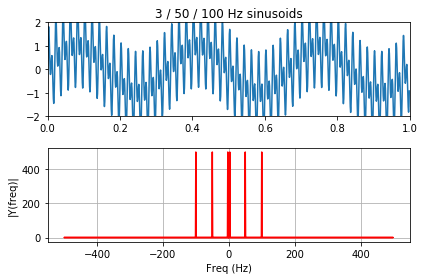

In [46]:
##Data
sig = Mysample.sample
##Plot
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, sig)
ax1.set_title('3 / 50 / 100 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
##FFT
Y = np.fft.fft(sig)
freq = np.fft.fftfreq(len(Y), d=Ts)
##Plot
ax2.plot(freq, np.abs(Y), 'r') 
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.grid(True)

plt.tight_layout()
plt.show()

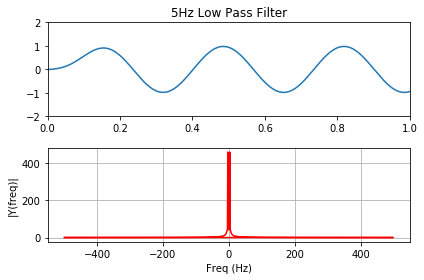

In [47]:
##Low Pass Filtered Data
sos = signal.butter(3, 5, 'lp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
##Plot
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, filtered)
ax1.set_title('5Hz Low Pass Filter')
ax1.axis([0, 1, -2, 2])
##FFT
Y = np.fft.fft(filtered)
freq = np.fft.fftfreq(len(Y), d=Ts)
##Plot
ax2.plot(freq, np.abs(Y), 'r') 
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.grid(True)

plt.tight_layout()
plt.show()

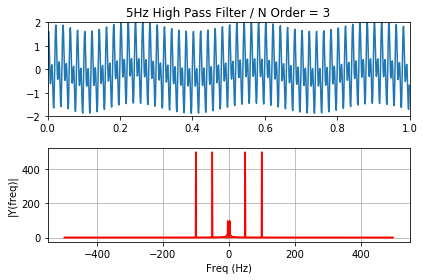

In [48]:
##Hihg Pass Filtered Data (n=3)
sos = signal.butter(3, 5, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
##Plot
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, filtered)
ax1.set_title('5Hz High Pass Filter / N Order = 3')
ax1.axis([0, 1, -2, 2])
##FFT
Y = np.fft.fft(filtered)
freq = np.fft.fftfreq(len(Y), d=Ts)
##Plot
ax2.plot(freq, np.abs(Y), 'r') 
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.grid(True)

plt.tight_layout()
plt.show()

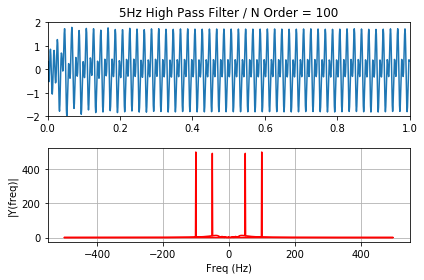

In [49]:
##High Pass Filtered Data (n=100)
sos = signal.butter(100, 5, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
##Plot
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, filtered)
ax1.set_title('5Hz High Pass Filter / N Order = 100')
ax1.axis([0, 1, -2, 2])
##FFT
Y = np.fft.fft(filtered)
freq = np.fft.fftfreq(len(Y), d=Ts)
##Plot
ax2.plot(freq, np.abs(Y), 'r') 
ax2.set_xlabel('Freq (Hz)')
ax2.set_ylabel('|Y(freq)|')
ax2.grid(True)

plt.tight_layout()
plt.show()